In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt
import plotly.express as px

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,QuantileTransformer,PowerTransformer



from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import SMOTE

#import warnings
#warnings.filterwarnings('ignore')

from pathlib import Path
PROJECT_ROOT = Path(os.path.abspath('')).resolve().parents[0]

In [2]:
PROJECT_ROOT

PosixPath('/Users/tiagofaria/Nova/DSDABA/Business Cases/BC2')

In [3]:
df = pd.read_csv(os.path.join(PROJECT_ROOT, 'data', 'H2.csv'))
df

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,0,23,2017,August,35,30,2,5,2,0.0,...,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,0,102,2017,August,35,31,2,5,3,0.0,...,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,0,34,2017,August,35,31,2,5,2,0.0,...,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,0,109,2017,August,35,31,2,5,2,0.0,...,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.isna().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [5]:
df.duplicated().sum()

25902

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

# Data Preparation

In [7]:
#drop colunas que nãofazem sentido estar
#será o ano importante?
data_prep_df = df.drop(columns =['ReservationStatus','ReservationStatusDate','ArrivalDateYear'])
#data_prep_df['Agent'] = data_prep_df['Agent'].replace(NULL,0)
data_prep_df['Company'] = data_prep_df['Company'].str.replace('NULL','0').astype(int)
data_prep_df['Agent'] = data_prep_df['Agent'].str.replace('NULL','0').astype(int)


In [8]:
#Remove blank spaces in words

numeric_data = data_prep_df.select_dtypes(include=[np.number]).copy().columns.tolist()
Categorical_Variables = data_prep_df.columns.drop(numeric_data).to_list()

for feat in Categorical_Variables: 
    data_prep_df[feat] = data_prep_df[feat].str.strip()


### Data Transform

In [9]:
#MISSING VALUES
def missing(dataset):
    missing_df = dataset.copy()
    missing_df['Country'].fillna(missing_df['Country'].mode()[0], inplace=True)
    missing_df['Children'].fillna(missing_df['Children'].mean(), inplace=True)
    
    #vale a pena o KNN? 
    return missing_df

In [10]:
#ENCODERS
def encode_categorical(dataset):
    encoded_df = dataset.copy()

    #months
    months = {'January':1,'February':2,'March':3,'April':4,'May':5,
             'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
    encoded_df['ArrivalDateMonth'] = encoded_df['ArrivalDateMonth'].map(months)
    
    #countries
    other_countries = list(filter(lambda w: w not in ['PRT','ITA','GBR','FRA','DEU','ESP'], list(df['Country'].unique())))
    encoded_df['Country'] = encoded_df['Country'].replace(other_countries,'Other')
    countries = {'PRT':1,'FRA':2,'DEU':3,'GBR':4,'ESP':5,'ITA':6,'Other':7}
    encoded_df['Country'] = encoded_df['Country'].map(countries)
    
    #ReservedRoom
    r_room = {'A':0, 'D':3, 'F':5,'E':4, 'B':1, 'G':6,'C':2, 'P':7}
    encoded_df['ReservedRoomType'] = encoded_df['ReservedRoomType'].map(r_room)
    
    #AssignRoom
    a_room = {'A':0, 'D':3, 'F':5,'E':4, 'B':1, 'G':6,'C':2, 'P':8,'K':7}
    encoded_df['AssignedRoomType'] = encoded_df['AssignedRoomType'].map(a_room)
    
    #DistributionChannel
    distri = {'TA/TO':3, 'Direct':1, 'Corporate':0, 'GDS':2, 'Undefined':4}
    encoded_df['DistributionChannel'] = encoded_df['DistributionChannel'].map(distri)
    
    
    #To one-hot
    list_to_dummify =['Meal','DepositType','CustomerType','MarketSegment']
    dummies = pd.get_dummies(encoded_df[list_to_dummify])
    encoded_df = encoded_df.join(dummies)
    encoded_df.drop(columns = list_to_dummify,axis=1,inplace=True)
    
    return encoded_df



# Call Functions

In [11]:
X = data_prep_df.drop(['IsCanceled'],axis=1)
y = data_prep_df['IsCanceled']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify = y, random_state=174)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train, random_state=174)

In [12]:
missing_df = missing(data_prep_df)
missing_train = missing(X_train)
missing_val = missing(X_val)

In [13]:
encoded_df = encode_categorical(missing_df)
encoded_train = encode_categorical(X_train)  
encoded_val = encode_categorical(X_val)    

In [14]:
features = ['LeadTime','TotalOfSpecialRequests','StaysInWeekNights','ADR','ArrivalDateWeekNumber',
           'Agent','ReservedRoomType','DepositType_No Deposit','BookingChanges','AssignedRoomType',
           'Country','PreviousCancellations','Company','DistributionChannel','DepositType_Non Refund',
           'MarketSegment_Online TA','ArrivalDateDayOfMonth','ArrivalDateMonth','CustomerType_Transient',
           'CustomerType_Transient-Party','RequiredCarParkingSpaces','DaysInWaitingList','StaysInWeekendNights',
           'PreviousBookingsNotCanceled','Adults']
#feature_df,feature_selection_df = feature_selection_table(encoded_df)
#feature_selection_df

In [15]:
#final_feature_dataset = feature_df[feature_selection_df.loc[feature_selection_df['Total'] >3].index.tolist()]
final_feature_train = encoded_train[features]
final_feature_val = encoded_val[features]

In [16]:
# normalization
scaler = QuantileTransformer()
scaler = scaler.fit(final_feature_train)

normalized_train = pd.DataFrame(scaler.transform(final_feature_train),columns=final_feature_train.columns)
normalized_val = pd.DataFrame(scaler.transform(final_feature_val),columns=final_feature_val.columns)



In [17]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    f1_micro = f1_score(y_val, pred_val,average='micro')
    f1_micro
    print(f'F1: {f1_micro}')

In [18]:
X_train_ext = normalized_train
X_val_ext = normalized_val

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter



over = SMOTE()
X_train_ext, y_train = over.fit_resample(X_train_ext, y_train)



print(sorted(Counter(y_train).items()))

[(0, 25888), (1, 25888)]


## **ExtraTrees**


In [20]:
EXT = ExtraTreesClassifier(random_state=15, 
                           n_estimators=150,
                           max_depth=45,
                           criterion='gini',
                           min_samples_split=15).fit(X_train_ext, y_train)

predicted_train_EXT = EXT.predict(X_train_ext) 
predicted_val_EXT = EXT.predict(X_val_ext)
f1_score(y_val, predicted_val_EXT,average='micro')

0.8750787848228917

In [21]:
metrics(y_train, predicted_train_EXT, y_val, predicted_val_EXT)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     25888
           1       0.95      0.94      0.94     25888

    accuracy                           0.94     51776
   macro avg       0.94      0.94      0.94     51776
weighted avg       0.94      0.94      0.94     51776

[[24578  1310]
 [ 1678 24210]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-------------------------------------------------------------------------------------------------------

## **Test Data**

In [22]:
missing_test = missing(X_test)
encoded_test = encode_categorical(X_test)  
final_feature_test = encoded_test[features]
normalized_test = pd.DataFrame(scaler.transform(final_feature_test),columns=final_feature_test.columns)


In [23]:
predicted_test = EXT.predict(normalized_test)
proba = EXT.predict_proba(normalized_test)

In [24]:
final_prediction = pd.DataFrame(index= y_test.index)
final_prediction['Real'] = y_test
final_prediction['Prediction'] = predicted_test

final_prediction

,Real,Prediction
28126,1,1
29382,1,1
34051,1,1
71329,0,1
2850,0,0
...,...,...
51327,0,0
2572,1,0
63680,0,1
15681,1,1


In [25]:
print(classification_report(y_test, predicted_test))
print(confusion_matrix(y_test, predicted_test))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6472
           1       0.87      0.81      0.84      4635

    accuracy                           0.87     11107
   macro avg       0.87      0.86      0.87     11107
weighted avg       0.87      0.87      0.87     11107

[[5910  562]
 [ 865 3770]]


In [26]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
    ax.set_ylim(bottom + 0.5, top - 0.5) #

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

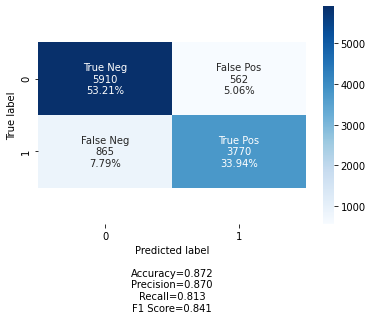

In [27]:
# Show the confusion matrix
from sklearn import metrics

cf = metrics.confusion_matrix(y_test,predicted_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

<AxesSubplot:>

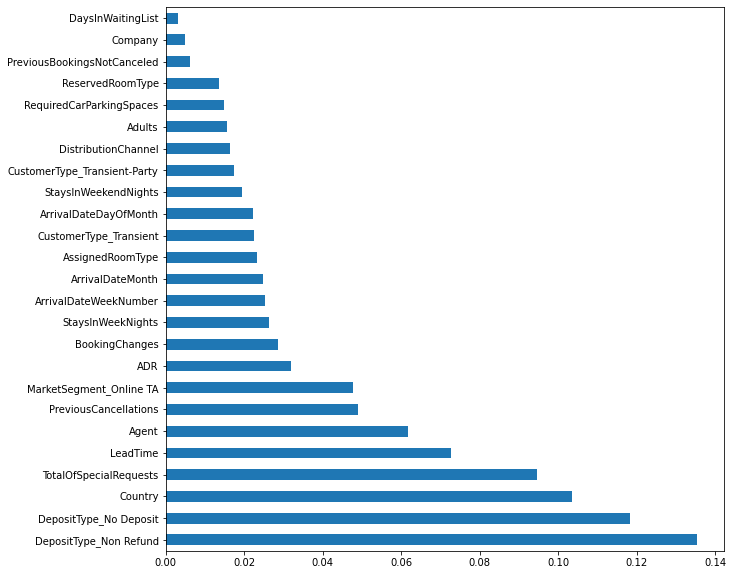

In [38]:
feature_importance = EXT.feature_importances_
feat_importances = pd.Series(EXT.feature_importances_, index=normalized_test.columns)
feat_importances = feat_importances.nlargest(25)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

# Predict new observation

In [28]:
new_obv = {
            'LeadTime':150, 
            'TotalOfSpecialRequests':0,
            'StaysInWeekNights':2,
            'ADR':104,
            'ArrivalDateWeekNumber':27,
            'Agent': 9, 
            'ReservedRoomType':'A',
            'DepositType':'No Deposit', #'DepositType_No Deposit'
            'BookingChanges':0,
            'AssignedRoomType':'A',
            'Country':'PRT',
            'PreviousCancellations':0,
            'Company':0,
            'DistributionChannel':'TA/TO',
            #'DepositType_Non Refund'
            #'MarketSegment_Online TA'
            'ArrivalDateDayOfMonth':15, 
            'ArrivalDateMonth':'May',
            'MarketSegment':'Online TA',
            'CustomerType':'Transient', #CustomerType_Transient
            #CustomerType_Transient
            'RequiredCarParkingSpaces':0,
            'DaysInWaitingList':4,
            'StaysInWeekendNights':1,
            'PreviousBookingsNotCanceled':0, 
            'Adults':2,
            
            }


new_df = pd.DataFrame(columns=list(new_obv.keys()))



transformed = {}
for feature in new_obv:
    if feature == 'MarketSegment':
        if new_obv[feature] == 'Online TA':
            transformed['MarketSegment_Online TA']=1
        else:
            transformed['MarketSegment_Online TA']=0
            
    elif feature == 'CustomerType':
        if new_obv[feature] == 'Transient':
            transformed['CustomerType_Transient']=1
            transformed['CustomerType_Transient-Party']=0 
            
        elif new_obv[feature] == 'Transient-Party':
            transformed['CustomerType_Transient']=0
            transformed['CustomerType_Transient-Party']=1 
        else:
            transformed['CustomerType_Transient']=0
            transformed['CustomerType_Transient-Party']=0 
            
            
    elif feature == 'DepositType':
        if new_obv[feature] == 'Non Refund':
            transformed['DepositType_Non Refund']=1
            transformed['DepositType_No Deposit']=0
            
        elif new_obv[feature] == 'No Deposit':
            transformed['DepositType_Non Refund']=0
            transformed['DepositType_No Deposit']=1  
            
        else:
            transformed['DepositType_Non Refund']=0
            transformed['DepositType_No Deposit']=0       
    else:     
        transformed[feature]=new_obv[feature]
        
    rearrange_cols =  ['LeadTime', 'TotalOfSpecialRequests', 'StaysInWeekNights', 'ADR',
       'ArrivalDateWeekNumber', 'Agent', 'ReservedRoomType',
       'DepositType_No Deposit', 'BookingChanges', 'AssignedRoomType',
       'Country', 'PreviousCancellations', 'Company', 'DistributionChannel',
       'DepositType_Non Refund', 'MarketSegment_Online TA',
       'ArrivalDateDayOfMonth', 'ArrivalDateMonth', 'CustomerType_Transient',
       'CustomerType_Transient-Party', 'RequiredCarParkingSpaces',
       'DaysInWaitingList', 'StaysInWeekendNights',
       'PreviousBookingsNotCanceled', 'Adults']
        
new_obv_df = pd.DataFrame(transformed,index=[0])
new_obv_df = new_obv_df[rearrange_cols]



In [29]:
def encode_categorical_new(dataset):
    encoded_df = dataset.copy()
    #months
    months = {'January':1,'February':2,'March':3,'April':4,'May':5,
             'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
    encoded_df['ArrivalDateMonth'] = encoded_df['ArrivalDateMonth'].map(months)
    
    #countries
    countries = {'PRT':1,'FRA':2,'DEU':3,'GBR':4,'ESP':5,'ITA':6,'Other':7}
    encoded_df['Country'] = encoded_df['Country'].map(countries)
        
    #ReservedRoom
    r_room = {'A':0, 'D':3, 'F':5,'E':4, 'B':1, 'G':6,'C':2, 'P':7}
    encoded_df['ReservedRoomType'] = encoded_df['ReservedRoomType'].map(r_room)
    
    #AssignRoom
    a_room = {'A':0, 'D':3, 'F':5,'E':4, 'B':1, 'G':6,'C':2, 'P':8,'K':7}
    encoded_df['AssignedRoomType'] = encoded_df['AssignedRoomType'].map(a_room)
    
    #DistributionChannel
    distri = {'TA/TO':3, 'Direct':1, 'Corporate':0, 'GDS':2, 'Undefined':4}
    encoded_df['DistributionChannel'] = encoded_df['DistributionChannel'].map(distri)
    
    
    return encoded_df

In [30]:
new_obv_df = encode_categorical_new(new_obv_df)
new_obv_df = pd.DataFrame(scaler.transform(new_obv_df),columns=new_obv_df.columns)
print(f'Probability of cancelation: {round(EXT.predict_proba(new_obv_df)[0][1]*100,2)}%')

Probability of cancelation: 61.76%


In [31]:
#Save models for app
from joblib import dump

out_path = os.path.join(PROJECT_ROOT, 'models')
dump(EXT, os.path.join(out_path, 'extra_tree.joblib'))
dump(scaler, os.path.join(out_path, 'scaler.joblib'))

['/Users/tiagofaria/Nova/DSDABA/Business Cases/BC2/models/scaler.joblib']